*Name: Vaidehi Anant Vatsaraj* <br>
*UID: 2018130060*

Experiment 2: To implement and use Principal Component Analysis using Python Platform.
Steps involved in PCA

1. Standardize the PCA.

2. Calculate the covariance matrix.

3. Find the eigenvalues and eigenvectors for the covariance matrix.

4. Plot the vectors on the scaled dat

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Read the data and perform basic exploratory analysis

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1XyD2vL5at4TQgFxdc-UQeSf2jeUjKGkrCBWRtjc_3_E/export?format=csv&gid=195848926')
df.head(10)

,erythema,scaling,definite borders,itching,koebner phenomenon,polygonal papulesy,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
5,2,3,2,0,0,0,0,0,0,0,0,0,2,1,0,2,2,0,2,0,0,0,1,0,0,0,0,2,0,0,0,1,0,41,2
6,2,1,0,2,0,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,2,0,18,5
7,2,2,3,3,3,3,0,2,0,0,0,2,0,0,0,2,3,0,0,0,0,0,0,0,0,2,2,3,2,0,0,3,3,57,3
8,2,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,0,2,0,0,0,2,0,22,4
9,2,2,1,0,1,0,0,0,0,0,0,0,0,0,0,3,2,0,2,0,0,0,0,0,0,0,0,2,0,0,0,2,0,30,4


#### Basic statistics

In [3]:
df.iloc[:,1:].describe()

,scaling,definite borders,itching,koebner phenomenon,polygonal papulesy,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.00000,366.000000
mean,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.04918,2.803279
std,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.24567,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.00000,1.000000
50%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.00000,3.000000
75%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,48.00000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.00000,6.000000


#### Boxplots by output labels/classes

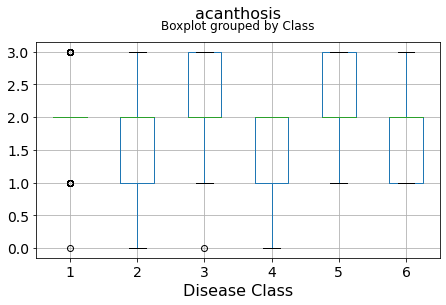

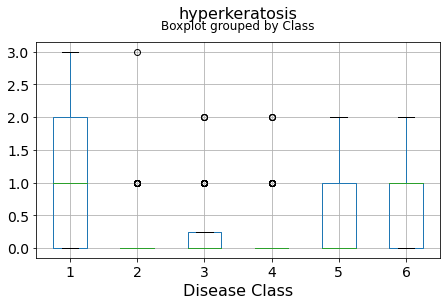

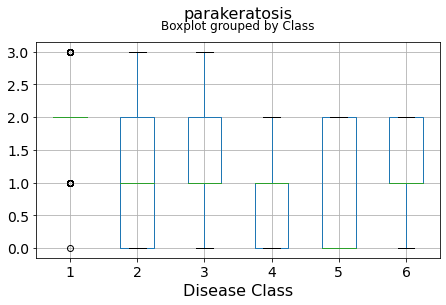

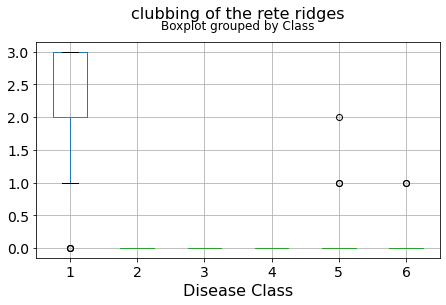

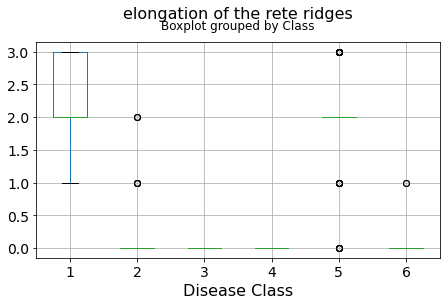

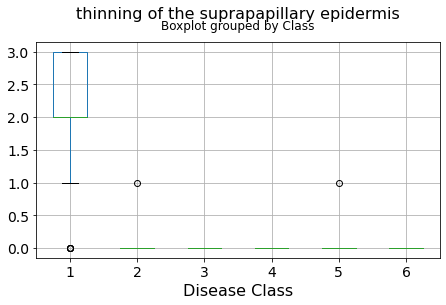

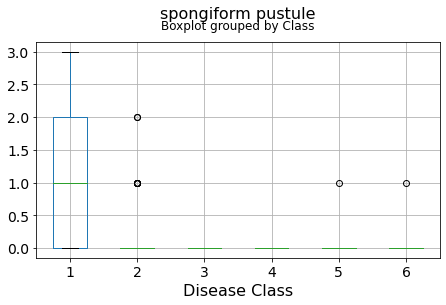

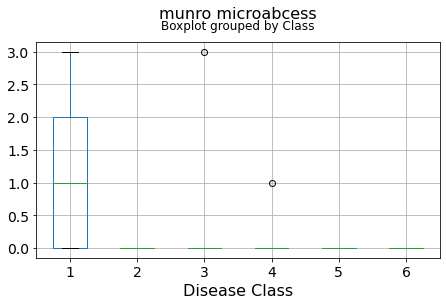

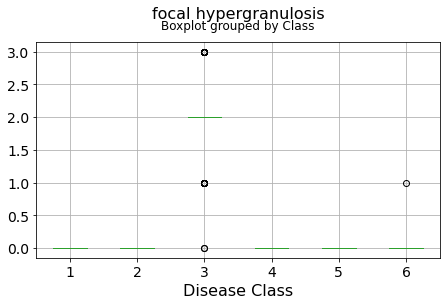

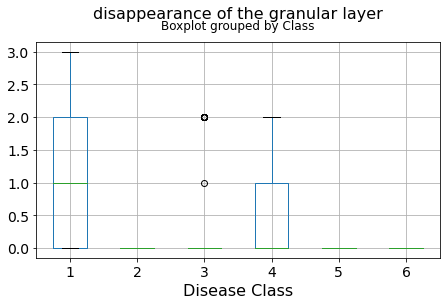

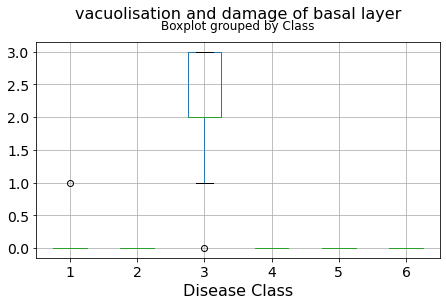

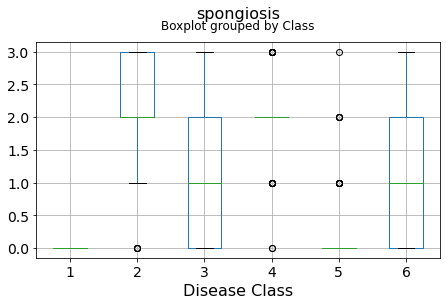

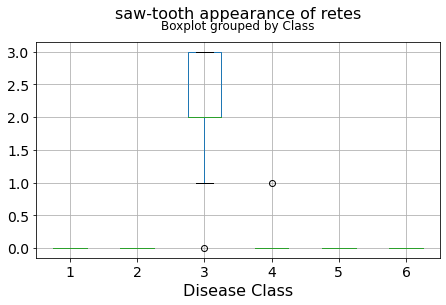

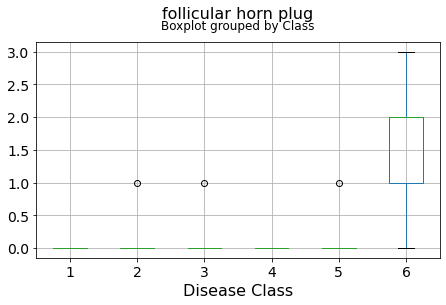

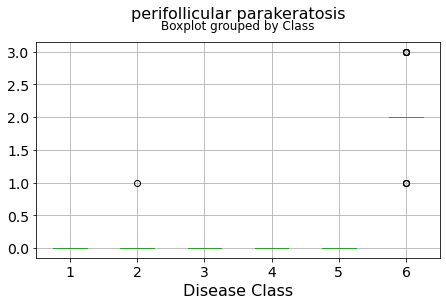

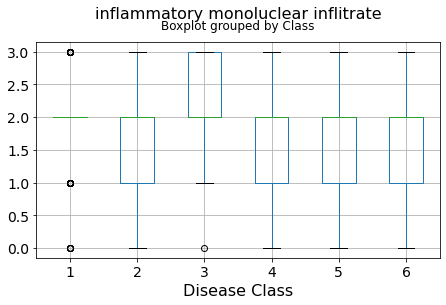

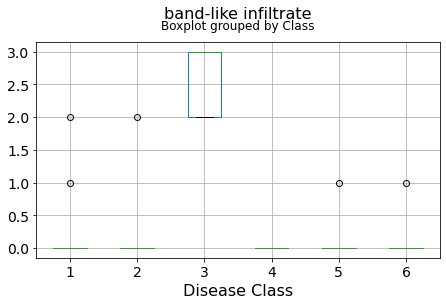

In [4]:
for c in df.columns[16:33]:
    df.boxplot(c,by='Class',figsize=(7,4),fontsize=14)
    plt.title("{}\n".format(c),fontsize=16)
    plt.xlabel("Disease Class", fontsize=16)

**It can be seen that some features classify the disease labels pretty clearly.** For example, spongiosis, family history produce boxplots with well-separated medians, which are clearly indicative of disease classes.

Below is an example of class seperation using two variables

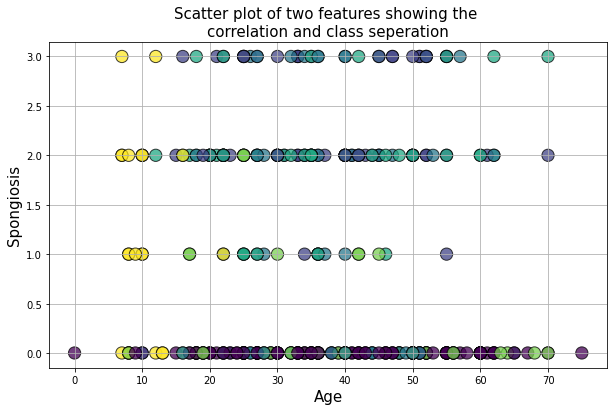

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['Age'],df['spongiosis'],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Spongiosis",fontsize=15)
plt.show()

#### Are the features independent? Plot co-variance matrix

It can be seen that there are some good amount of correlation between features i.e. they are not independent of each other, as assumed in Naive Bayes technique. However, we will still go ahead and apply yhe classifier to see its performance.

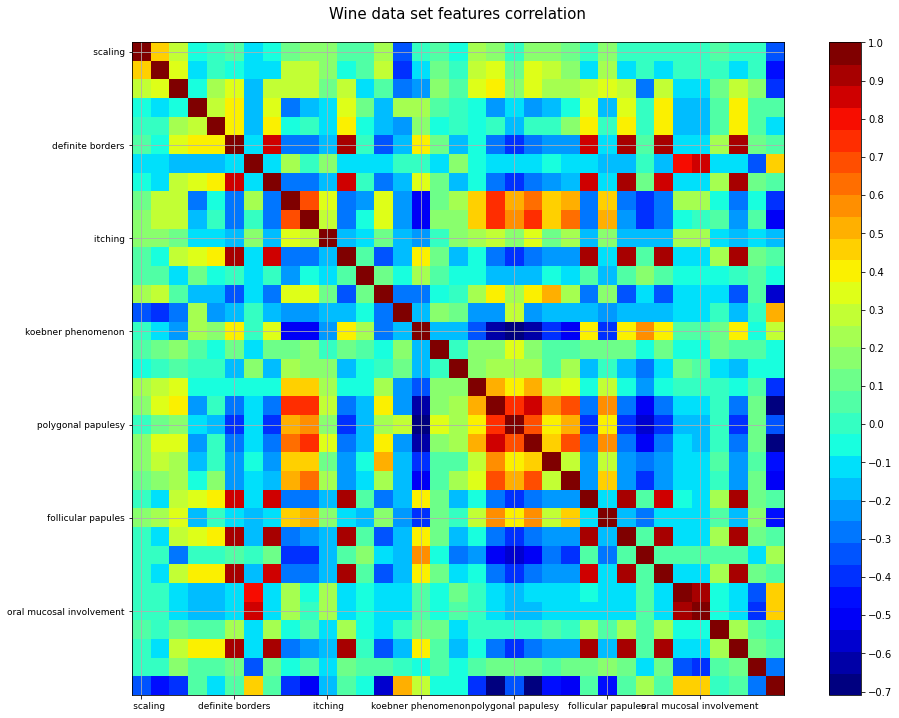

In [6]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Wine data set features correlation\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df)

## Principal Component Analysis

### Data scaling
PCA requires scaling/normalization of the data to work properly

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

In [9]:
X = df.drop('Class',axis=1)
y = df['Class']

In [10]:
X = scaler.fit_transform(X)

In [11]:
dfx = pd.DataFrame(data=X,columns=df.columns[1:])

In [12]:
dfx.head(10)

,scaling,definite borders,itching,koebner phenomenon,polygonal papulesy,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
0,-0.102895,0.292503,-1.709375,1.437334,-0.699049,-0.468702,-0.292496,-0.452637,0.392453,-0.574000,-0.379144,-0.465529,-0.338850,-0.671035,-0.394456,1.478951,0.061439,-0.697442,-1.407407,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,-0.463831,-0.537770,-0.478502,1.813219,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,1.244731
1,1.403482,1.719916,1.600843,0.557628,0.403761,-0.468702,-0.292496,-0.452637,0.392453,0.531705,2.637522,-0.465529,-0.338850,0.556959,-0.394456,-0.334436,0.061439,-0.697442,0.775267,1.265952,0.868707,1.321827,2.545942,0.839102,-0.463831,-0.537770,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,-1.842331
2,-0.102895,-1.134911,0.497437,1.437334,0.403761,2.669312,-0.292496,3.148777,-0.626255,-0.574000,-0.379144,0.685711,-0.338850,-0.671035,-0.394456,-0.334436,0.061439,-0.697442,0.775267,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,1.893978,-0.537770,1.618885,1.813219,1.621970,-0.230817,-0.235125,0.184632,2.214200,-0.660052
3,-0.102895,0.292503,0.497437,-1.201784,-0.699049,-0.468702,-0.292496,-0.452637,2.429870,1.637410,-0.379144,-0.465529,-0.338850,3.012948,-0.394456,-1.241130,0.061439,-0.697442,1.866604,1.265952,0.868707,1.321827,2.545942,-0.478972,-0.463831,2.935592,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,1.563724,-0.502215,0.259498
4,-0.102895,1.719916,0.497437,0.557628,1.506571,1.623308,-0.292496,1.948306,-0.626255,-0.574000,-0.379144,0.685711,-0.338850,-0.671035,-0.394456,-0.334436,0.061439,-0.697442,-1.407407,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,1.893978,1.777805,2.667578,0.927187,2.670805,-0.230817,-0.235125,0.184632,2.214200,0.587909
5,-0.102895,1.719916,0.497437,-1.201784,-0.699049,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,-0.379144,-0.465529,4.524642,0.556959,-0.394456,0.572257,0.061439,-0.697442,0.775267,-0.629093,-0.854581,-0.613328,1.052649,-0.478972,-0.463831,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,-1.194459,-0.502215,0.325181
6,-0.102895,-1.134911,-1.709375,0.557628,-0.699049,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,-0.379144,-0.465529,-0.338850,-0.671035,3.126783,-0.334436,1.466846,-0.697442,-1.407407,-0.629093,0.868707,-0.613328,-0.440644,-0.478972,-0.463831,-0.537770,-0.478502,-0.844878,-0.475701,-0.230817,-0.235125,0.184632,-0.502215,-1.185510
7,-0.102895,0.292503,1.600843,1.437334,2.609381,2.669312,-0.292496,1.948306,-0.626255,-0.574000,-0.379144,1.836950,-0.338850,-0.671035,-0.394456,0.572257,1.466846,-0.697442,-1.407407,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,-0.463831,1.777805,1.618885,1.813219,1.621970,-0.230817,-0.235125,1.563724,2.214200,1.376096
8,-0.102895,0.292503,-0.605969,-1.201784,1.506571,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,-0.379144,-0.465529,-0.338850,-0.671035,-0.394456,0.572257,-1.343969,-0.697442,-0.316070,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,-0.463831,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,0.184632,-0.502215,-0.922781
9,-0.102895,0.292503,-0.605969,-1.201784,0.403761,-0.468702,-0.292496,-0.452637,-0.626255,-0.574000,-0.379144,-0.465529,-0.338850,-0.671035,-0.394456,1.478951,0.061439,-0.697442,0.775267,-0.629093,-0.854581,-0.613328,-0.440644,-0.478972,-0.463831,-0.537770,-0.478502,0.927187,-0.475701,-0.230817,-0.235125,0

In [13]:
dfx.describe()

,scaling,definite borders,itching,koebner phenomenon,polygonal papulesy,follicular papules,oral mucosal involvement,knee and elbow involvement,scalp involvement,family history,melanin incontinence,eosinophils in the infiltrate,PNL infiltrate,fibrosis of the papillary dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing of the rete ridges,elongation of the rete ridges,thinning of the suprapapillary epidermis,spongiform pustule,munro microabcess,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear inflitrate,band-like infiltrate,Age,Class
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,-2.147645e-16,5.278109e-17,-4.157270e-16,5.217442e-17,1.368062e-16,2.730057e-18,1.055622e-16,1.132973e-16,-8.614845e-17,-4.732098e-17,-1.113256e-16,9.524864e-17,-1.204258e-16,-3.455038e-16,-5.065772e-17,-8.614845e-17,4.947848e-16,-2.663322e-16,-2.320548e-16,-3.761411e-16,-3.245734e-16,-8.129502e-17,1.817004e-16,-1.419629e-16,-3.837246e-17,-1.246119e-15,-9.767536e-17,4.792766e-17,1.820038e-17,-7.628992e-17,1.324077e-16,-5.199241e-16,1.449963e-16,-1.053726e-16
std,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00,1.001369e+00
min,-3.115648e+00,-2.562324e+00,-1.709375e+00,-1.201784e+00,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,-3.791438e-01,-4.655285e-01,-3.388499e-01,-6.710352e-01,-3.944557e-01,-1.241130e+00,-2.749376e+00,-6.974421e-01,-1.407407e+00,-6.290926e-01,-8.545814e-01,-6.133275e-01,-4.406438e-01,-4.789723e-01,-4.638313e-01,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,-2.573550e+00,-5.022153e-01,-2.367789e+00
25%,-1.028946e-01,-1.134911e+00,-6.059689e-01,-1.201784e+00,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,-3.791438e-01,-4.655285e-01,-3.388499e-01,-6.710352e-01,-3.944557e-01,-1.241130e+00,6.143857e-02,-6.974421e-01,-3.160703e-01,-6.290926e-01,-8.545814e-01,-6.133275e-01,-4.406438e-01,-4.789723e-01,-4.638313e-01,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,-1.194459e+00,-5.022153e-01,-7.257343e-01
50%,-1.028946e-01,2.925027e-01,4.974372e-01,-3.220782e-01,-6.990489e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,-6.262552e-01,-5.739998e-01,-3.791438e-01,-4.655285e-01,-3.388499e-01,-6.710352e-01,-3.944557e-01,5.722575e-01,6.143857e-02,-6.974421e-01,-3.160703e-01,-6.290926e-01,-8.545814e-01,-6.133275e-01,-4.406438e-01,-4.789723e-01,-4.638313e-01,-5.377701e-01,-4.785022e-01,-8.448778e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,1.846324e-01,-5.022153e-01,-6.891246e-02
75%,-1.028946e-01,2.925027e-01,4.974372e-01,5.576279e-01,4.037610e-01,-4.687015e-01,-2.924961e-01,-4.526367e-01,3.924533e-01,5.317051e-01,-3.791438e-01,-4.655285e-01,-3.388499e-01,5.569592e-01,-3.944557e-01,5.722575e-01,6.143857e-02,6.251683e-01,7.752667e-01,1.265952e+00,8.687067e-01,3.542495e-01,-4.406438e-01,-4.789723e-01,-4.638313e-01,6.200173e-01,-4.785022e-01,9.271868e-01,-4.757013e-01,-2.308165e-01,-2.351254e-01,1.846324e-01,-5.022153e-01,7.849560e-01
max,1.403482e+00,1.71991

### PCA class import and analysis

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=None)

In [16]:
dfx_pca = pca.fit(dfx)

#### Plot the _explained variance ratio_

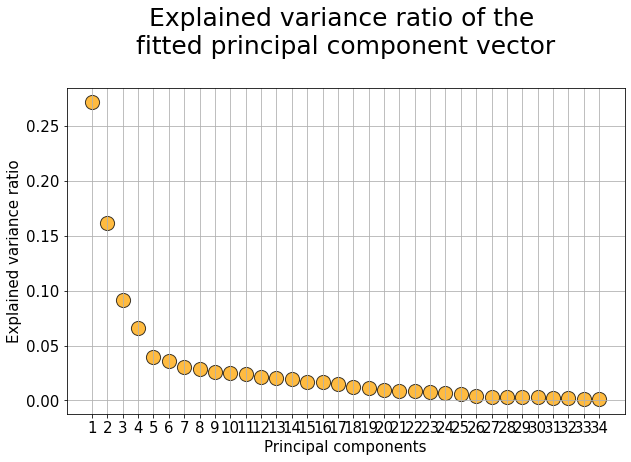

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x=[i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],
            y=dfx_pca.explained_variance_ratio_,
           s=200, alpha=0.75,c='orange',edgecolor='k')
plt.grid(True)
plt.title("Explained variance ratio of the \nfitted principal component vector\n",fontsize=25)
plt.xlabel("Principal components",fontsize=15)
plt.xticks([i+1 for i in range(len(dfx_pca.explained_variance_ratio_))],fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Explained variance ratio",fontsize=15)
plt.show()

**The above plot means that the $1^{st}$ principal component explains about 30% of the total variance in the data and the $2^{nd}$ component explians further 15%. Therefore, if we just consider first two components, they together explain 45% of the total variance.**

### Showing better class separation using principal components

#### Transform the scaled data set using the fitted PCA object

In [18]:
dfx_trans = pca.transform(dfx)

#### Put it in a data frame

In [19]:
dfx_trans = pd.DataFrame(data=dfx_trans)
dfx_trans.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,0.928848,-2.576072,-1.153939,-1.218478,0.312338,0.109586,-0.752977,0.249262,-0.195484,-0.217253,0.266354,-0.525182,1.931917,-0.890874,-1.262078,0.392616,0.467131,-1.329689,0.110463,-0.881912,-0.144372,-0.553089,0.779061,0.465789,-0.054020,-0.173183,-0.073192,0.209316,0.115649,0.101866,-0.088309,-0.126457,0.017950,0.003763
1,-3.182165,1.969107,0.885500,-1.372950,-0.279435,1.431882,-0.830935,-0.403941,2.771577,-0.332335,0.904114,-0.316209,0.291753,1.553179,1.238301,-0.935927,-0.122435,-0.340134,0.713096,-0.811342,0.838947,-0.602583,-0.279062,-0.233684,-0.162422,-0.123959,-0.001858,0.236471,-0.172907,0.333528,-0.017516,0.056546,-0.056471,0.022247
2,5.234964,2.099129,0.593631,0.390164,-0.054828,0.054126,-0.028127,-0.022753,0.656620,-1.147384,0.151403,1.296773,0.419823,-0.712790,0.072887,-0.141131,-0.669471,0.504641,1.541734,0.306750,0.083617,0.497217,0.578555,0.888032,0.588916,-0.849685,-0.133265,0.450053,-0.138623,-0.901365,0.794543,0.234801,0.179812,0.326699
3,-4.471821,2.850233,0.035899,-1.091929,-1.055561,-1.648282,3.117939,-0.183402,0.214209,-0.190247,0.254679,0.855202,0.138051,-0.514045,-0.953092,-0.787898,-1.235521,0.279401,-0.933284,0.804665,-1.032129,0.283939,0.037643,-0.401209,-0.050856,0.103859,-0.205115,0.414872,0.108266,-0.002722,-0.028022,0.010022,0.147116,0.042354
4,4.770065,2.907778,0.350892,-0.478007,0.446979,-1.023902,-0.466232,-0.273350,0.289156,-0.244563,-0.264316,-1.208904,0.696546,0.306479,-1.628846,-0.738944,0.774435,0.042255,0.381072,1.824941,-0.004728,0.580314,-0.007081,0.173975,0.315488,0.369732,0.968833,0.151949,0.261115,0.515041,0.898574,0.108339,-0.014652,0.881661
5,-0.187165,-1.383323,-0.865757,-3.264113,-1.661404,2.059018,0.794602,-1.304132,-2.041341,-0.872240,-1.328903,-0.801849,-0.449401,0.712872,0.817257,-1.714616,0.107001,0.206994,0.635114,0.199257,0.082811,-0.260193,-0.178497,-0.661001,-0.294561,0.068252,-0.069408,0.271412,-0.251872,0.072792,0.025436,0.162133,0.052769,0.045622
6,0.034713,-2.592562,-1.784013,2.817164,-1.846711,-0.176547,-0.218533,0.722907,1.341234,-0.725936,0.639876,-0.552663,-0.494040,0.626750,-0.339236,0.723395,-0.011696,-0.408543,-0.011451,0.296410,-0.320363,-0.462569,-0.438250,-0.219573,0.156563,-0.001083,-0.151373,0.112204,-0.194580,0.152327,0.059004,0.024742,-0.039759,0.025151
7,4.927680,2.981911,-0.146171,-0.387228,-0.028245,-1.600643,-0.886993,1.569601,-0.187558,0.210321,-0.678127,-1.386283,1.813804,0.592364,-1.333199,-0.356442,-0.820126,1.172185,0.147455,0.345789,-0.093649,0.799294,0.228915,0.409793,-0.159688,1.361524,0.509328,0.712579,-0.916102,-1.128022,-0.465645,0.562631,0.348499,0.067947
8,0.618579,-2.019644,-0.389487,-1.390787,1.538779,-1.001354,-0.403813,0.534306,0.637589,-0.249143,-0.827316,0.155668,-0.398971,0.530731,1.163380,-0.229459,0.070753,-0.325902,-0.071299,0.636695,-0.446215,0.001408,-0.153872,-0.151298,-0.032320,0.135740,-0.001591,-0.043320,-0.068005,-0.013397,0.067509,0.012615,0.095338,0.060294
9,0.564533,-1.844136,-0.392897,-1.437740,0.112736,-0.971924,-0.722713,0.289536,-0.063302,-0.231875,-0.874784,0.916915,0.102403,-0.053878,1.055953,0.035922,-0.148006,-0.619396,-0.408498,0.019321,-0.137013,-0.372680,-0.410056,-0.716656,-0.423031,-0.082054,0.010296,0.147746,-0.148809,-0.076277,0.087346,0.042107,0.053577,0.044010


#### Plot the first two columns of this transformed data set with the color set to original ground truth class label

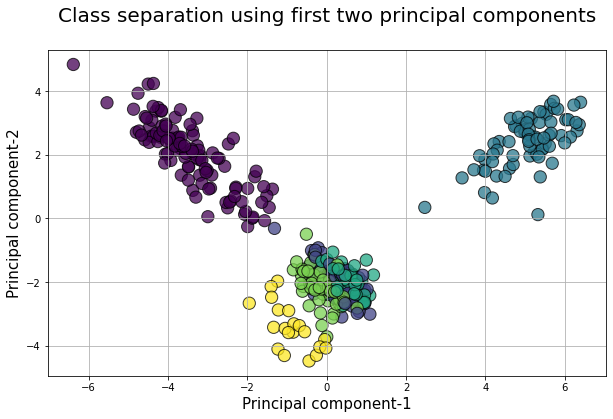

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(dfx_trans[0],dfx_trans[1],c=df['Class'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

## Conclusion

PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables. used when the dimensions of the input features are high (e.g. a lot of variables). PCA can be also used for denoising and data compression.

The seperability between classes is evident from the last figure shown and it signifies the advantages of performing PCA before building the model.